# Bankruptcy Prediction via Regression


In this assignment, you use the bankruptcy data set from a paper (see the reference in the bottom of the assignment). The data set can be downloaded from HuskyCT. The following is the information of the attributes/variables, from the income statements and balance sheets:

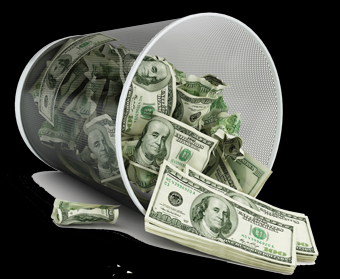


1)	Size
    
a.	Sales

2)	Profit

a.	ROCE: profit before tax=capital employed (%)

b.	FFTL: funds flow (earnings before interest, tax & depreciation)=total liabilities

3)	Gearing

a.	GEAR: (current liabilities + long-term debt)=total assets

b.	CLTA: current liabilities=total assets

4)	Liquidity

a.	CACL: current assets=current liabilities

b.	QACL: (current assets – stock)=current liabilities

c.	WCTA: (current assets – current liabilities)=total assets	

5)	LAG: number of days between account year end and the date the annual report and accounts were filed at company registry.

6)	AGE: number of years the company has been operating since incorporation date.

7)	CHAUD: coded 1 if changed auditor in previous three years, 0 otherwise

8)	BIG6: coded 1 if company auditor is a Big6 auditor, 0 otherwise

The target variable is FAIL, either = 1 or 0. You program and model using logistic regression.

#### Source:

Malcolm J. Beynon, Michael J. Peel, Variable precision rough set theory and data discretisation: an application to corporate failure prediction

## Modeling using scikit-learn

The fisrt part shows you how to use scikit-learn for this type of problems.

In [15]:
# Download the training data set and no-label test set from the practice project "Bankruptcy Prediction"
# bankruptcytrainpost.csv
# at https://www.scriptedin.com/contests/view/3

import pandas as pd
bankruptcy_df = pd.read_csv(r'C:\Users\User\Desktop\2019 Spring\Big Data\Week3\HW3\bankruptcytrainpost.csv',header =0)
bankruptcy_df.head()

,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
1,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0
2,16737,17.9949,0.4388,0.5236,0.4347,1.1748,0.9795,0.0760,55,26,0,1,0
3,48162,6.1787,0.1181,0.9996,0.7437,1.3007,0.9070,0.2236,303,34,0,0,1
4,6953,0.0648,0.1447,0.9520,0.4976,1.0410,0.5355,0.0204,362,14,1,1,1


### Data Exploration

Exploring the dataset using plots, histograms, descriptive statistics, etc.

In [16]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# target variable distribution
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# replace yes by 1, no by 0
bankruptcy_df.groupby(['FAIL'])[['FAIL']].count()

,FAIL
FAIL,
0,22
1,22


In [17]:
bankruptcy_df.head()

,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
1,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0
2,16737,17.9949,0.4388,0.5236,0.4347,1.1748,0.9795,0.0760,55,26,0,1,0
3,48162,6.1787,0.1181,0.9996,0.7437,1.3007,0.9070,0.2236,303,34,0,0,1
4,6953,0.0648,0.1447,0.9520,0.4976,1.0410,0.5355,0.0204,362,14,1,1,1


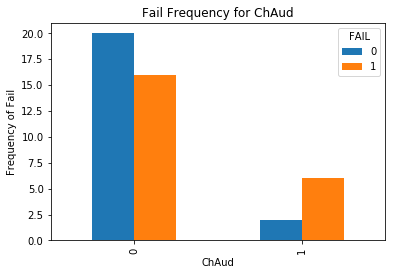

In [6]:
# cross tabulation of Age and Fail (Target variable).
pd.crosstab(bankruptcy_df.CHAUD,bankruptcy_df.FAIL).plot(kind='bar')
plt.title('Fail Frequency for ChAud')
plt.xlabel('ChAud')
plt.ylabel('Frequency of Fail')
plt.show()

We can see that companies with CHAUD = 1 is more likely to fail. CHAUD status may be used for modeling later

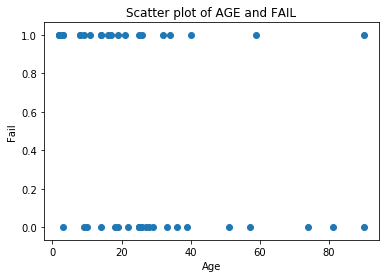

In [18]:
# Scatter plot of age and subscription
import matplotlib.pyplot as plt 
plt.scatter(bankruptcy_df.AGE,bankruptcy_df.FAIL)
plt.title('Scatter plot of AGE and FAIL')
plt.xlabel('Age')
plt.ylabel('Fail')
plt.show()

Age does'n seem a good predictor as the target variable doesn't seem depending on the age on the scatter plot

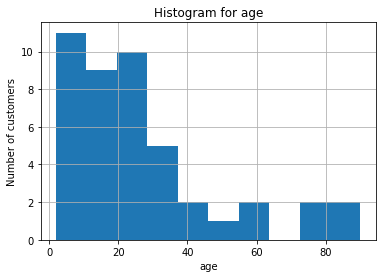

In [19]:
# Histogram of age.
import matplotlib.pyplot as plt 
bankruptcy_df.AGE.hist()
plt.title('Histogram for age')
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.show()

### Preprocessing

In [60]:
from sklearn.model_selection import train_test_split
X = bankruptcy_df[bankruptcy_df.columns.difference(['Firm', 'FAIL'])]
y = bankruptcy_df[['FAIL']]
y.head()

# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
y_train.shape

(30, 1)

In [25]:
# This is to ignore some warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [52]:
# RFE to select features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.FAIL.values.tolist())

# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)


In [49]:
'''RFE : Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.'''

'RFE : Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.'

In [47]:
print(y_train.FAIL.values.tolist())
rfe

[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [65]:
# Now select features
X_train = X_train.iloc[:,rfe.support_ == True]
X_test = X_test.iloc[:,rfe.support_ == True]
print(X_train)
X_train1 = X_train.iloc[1,rfe.support_ == True]
X_train1

    AGE  BIG6    CACL  CHAUD    CLTA    FFTL    GEAR  LAG    QACL     ROCE  \
43   10     1  1.1864      0  0.7018  0.5326  0.7018  249  1.1762  33.8451   
18   29     1  0.6236      0  1.2218  0.0271  1.2218  287  0.3153  -1.0712   
15   90     0  0.7485      0  1.0139 -0.0363  1.0139  301  0.5265 -16.6670   
22    2     0  0.7340      0  1.2024 -0.2121  1.2343  360  0.5056 -31.2540   
16    2     1  0.8556      0  0.7585  0.1691  0.8813  309  0.5182   5.3741   
40   19     0  1.1399      0  0.6560  0.1176  0.7461  144  0.6296   4.4452   
8    27     1  1.1907      0  0.4533  0.2170  0.5398  168  0.8894   4.4080   
13   16     0  1.1661      1  0.7034  0.1781  0.7286  172  0.5598   4.0961   
5     3     0  0.6086      1  0.6672  0.1451  0.6925  289  0.4879  -2.6840   
17   74     0  1.5489      0  0.6233  0.1545  0.6233   96  0.7356   7.5364   
32   26     1  2.0674      1  0.2986  0.2122  0.9969  303  0.7283  13.9864   
14    3     1  1.0630      0  0.7081 -0.0359  0.8613  265  0.559

AGE         29.0000
BIG6         1.0000
CACL         0.6236
CHAUD        0.0000
CLTA         1.2218
FFTL         0.0271
GEAR         1.2218
LAG        287.0000
QACL         0.3153
ROCE        -1.0712
SALES    16149.0000
WCTA        -0.4599
Name: 18, dtype: float64

### Training, Testing and Validation

We train a model using the training data set, and test the model using the test data set we had from the splitting function above

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train.FAIL.values.tolist())
y_train_pred = logreg.predict(X_test)
y_test_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train.FAIL.values.tolist())))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test.FAIL.values.tolist())))


Accuracy of logistic regression classifier on train set: 0.73
Accuracy of logistic regression classifier on test set: 0.71


How about precision and recall?

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test.FAIL.values.tolist(), y_test_pred)
print(confusion_matrix)
print(classification_report(y_test.FAIL.values.tolist(), y_test_pred))

[[6 1]
 [3 4]]
             precision    recall  f1-score   support

          0       0.67      0.86      0.75         7
          1       0.80      0.57      0.67         7

avg / total       0.73      0.71      0.71        14



Up to here we haven't tuned the model for the best parameters yet. We create a grid of hyper-parameters for training, and see which set of hyper-parameters would give the best performance. Here we use scikit-learn GridSearchCV on k-fold stratified sampling. The whole training data set is split in k folds. Each time 1 fold is used for validating and the rest is for training the model 
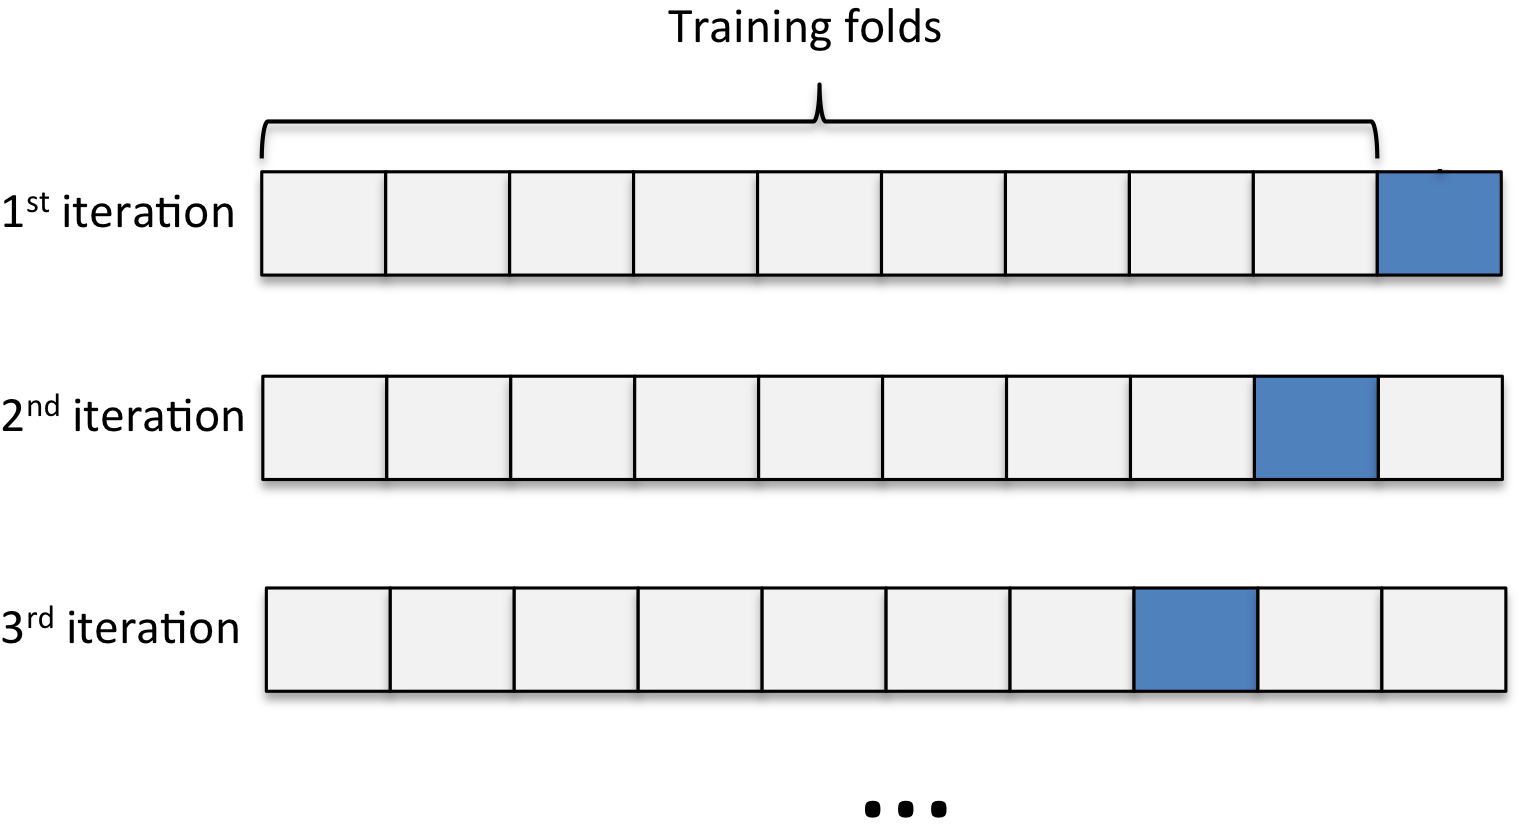

In [66]:
# this part of code is to validate the model, not required for this assignment
from sklearn.model_selection import GridSearchCV

# Create regularization hyperparameter space
C = np.logspace(0, 3, 10)

# Set the parameters by cross-validation, penalty is regularization
# As 'newton-cg','lbfgs','sag' only work with L2 regularization, we have 2 dictionaries: 
# hyper_parameters_l1, and hyper_parameters_l2 in hyper_parameters dict
hyper_parameters_l1 = dict(C=C, penalty=['l2'], solver=['newton-cg','lbfgs','sag'])
hyper_parameters_l2 = dict(C=C, penalty=['l1', 'l2'], solver=['liblinear', 'saga'])
hyper_parameters = [hyper_parameters_l1, hyper_parameters_l2]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(logreg, hyper_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 21.544346900318832, 'penalty': 'l2', 'solver': 'lbfgs'}

Grid scores on development set:

0.575 (+/-0.484) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.608 (+/-0.296) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.425 (+/-0.490) for {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.575 (+/-0.484) for {'C': 2.154434690031884, 'penalty': 'l2', 'solver': 'newton-cg'}
0.608 (+/-0.296) for {'C': 2.154434690031884, 'penalty': 'l2', 'solver': 'lbfgs'}
0.425 (+/-0.490) for {'C': 2.154434690031884, 'penalty': 'l2', 'solver': 'sag'}
0.575 (+/-0.484) for {'C': 4.641588833612778, 'penalty': 'l2', 'solver': 'newton-cg'}
0.608 (+/-0.296) for {'C': 4.641588833612778, 'penalty': 'l2', 'solver': 'lbfgs'}
0.383 (+/-0.343) for {'C': 4.641588833612778, 'penalty': 'l2', 'solver': 'sag'}
0.635 (+/-0.334) for {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.590 (+/-0.514) for {'C': 10.0, 'penalty

## Your work

Starting here write your own logistic regression code to classify companies using test data, compute the accuracy, confusion matrix, precision, recall. Start with writing individual functions, then the main code that calls the functions above to train a model using the training data and return theta, then test the model using the test data, compute accuracy, confusion matrix, precision, recall.

Your code uses the same training dataset above bankruptcytrainpost.csv.

### Data Exploration

In [ ]:
# Q1: Explore more variables here



### Preprocessing

In [ ]:
# Simply copy down from above



### Training, Testing and Validation

In [73]:
# Q4
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [119]:
theta = np.zeros((X_train.shape[1], 1)) 
y = y_train
X = X_train
m = len(X)
A = sigmoid(np.dot(X, theta))
lambdad = 0.001

In [347]:
# Q2
def computeCost(X, y, theta = None, lambdad = 0.1):
    # write your code here
    m = len(y)
    A = sigmoid(np.dot(X,theta))   
    #cost=((-np.sum(np.multiply(np.transpose(y),np.log(A))+np.multiply(np.transpose(1-y),np.log(1-A)))+lambdad/2*np.sum(theta[1:]*theta[1:])))/m
    cost = (1/m)*(- y.dot(np.transpose(np.log(A))) - (np.log(1 - A).dot(np.transpose(1 - y)) + lambdad/(2*m)*np.sum(np.multiply(theta[1:],theta[1:]))))
    return cost

In [348]:
# Q3
def optimizeCost(X, y, theta, step, lambdad, maxrun, alp = 0.001):
    # alp = learning rate, step = value when the minimization complete
    m = len(y)
    A=sigmoid(np.dot(X,theta))
    for i in range(maxrun):
        cost_init = computeCost(X,y,theta, lambdad)
       # theta[0] = theta[0] - (alp/m)*sum(np.dot(np.transpose(X)[0,:], A - y))
        theta[0] = theta[0] - (alp/m)*np.sum(A - y)
        #theta[1:] = theta[1:] - alp*((1/m)*sum(np.dot(np.transpose(X)[1:,:], (A - y))) + (lambdad/m)*theta[1:])      
        theta[1:] = theta[1:] - alp*((1/m)*np.dot(np.transpose(X)[1:], (A - y)) + (lambdad/m)*theta[1:])
        z = np.dot(X, theta)
        cost = computeCost(X, y, z, lambdad)
        
        if abs(cost - cost_init) < step:
            break
    return theta,cost

In [349]:
theta = np.zeros((X_train.shape[1], 1)) 
print(theta.shape)
X.shape
np.dot(X,theta)

(12, 1)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [335]:
theta = np.zeros((X_train.shape[1], 1)) 
cost_init = computeCost(X,y,theta, lambdad)
cost_init

theta[0] = theta[0] - (alp/m)*np.sum(A - y)
        #theta[1:] = theta[1:] - alp*((1/m)*sum(np.dot(np.transpose(X)[1:,:], (A - y))) + (lambdad/m)*theta[1:])      

theta[1:] = theta[1:] - alp*((1/m)*np.dot(np.transpose(X)[1:], (A - y)) + (lambdad/m)*theta[1:])

#z = np.dot(np.transpose(theta).shape,np.transpose(X))
#cost = computeCost(X, y, z, lambdad)
print(np.transpose(theta).shape)
print(np.transpose(X).shape)

(1, 12)
(12, 30)


In [350]:
from numpy import *

lambdad = 100
cost_init = computeCost(X,y,theta, 0.01)
      # theta[0] = theta[0] - (alp/m)*sum(np.dot(np.transpose(X)[0,:], A - y))
theta[0] = theta[0] - (alp/m)*np.sum(A - y)
        #theta[1:] = theta[1:] - alp*((1/m)*sum(np.dot(np.transpose(X)[1:,:], (A - y))) + (lambdad/m)*theta[1:])      
theta[1:] = theta[1:] - alp*((1/m)*np.dot(np.transpose(X)[1:], (A - y)) + (lambdad/m)*theta[1:])
theta
#cost_init = computeCost(X,y,theta, 0.01)
#cost_init

theta
cost_init2 = computeCost(X,y,theta, 1000)
theta

array([[ 5.00000000e-04],
       [ 1.33333333e-04],
       [ 5.07443333e-04],
       [ 1.33333333e-04],
       [ 3.65230000e-04],
       [ 4.59933333e-05],
       [ 4.33060000e-04],
       [ 1.44300000e-01],
       [ 3.33890000e-04],
       [-4.90010000e-04],
       [ 4.95306667e+00],
       [-1.59633333e-05]])

In [110]:
print(np.transpose(y_train).shape)
#np.multiply(y_train,np.transpose(np.log(A)))
y_train.dot(np.transpose(np.log(A)))
np.transpose(1 - y_train).shape
np.log(1 - A).shape
#(np.transpose(1 - y_train))*np.log(1 - A)
np.log(1 - A).dot(np.transpose(1 - y_train)).shape

(1, 30)


(44, 30)

In [304]:
sum(A-y)*transpose(X)

,43,18,15,22,16,40,8,13,5,17,...,23,36,21,19,9,39,42,3,0,FAIL
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIG6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CACL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QACL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
theta = np.zeros((X_train.shape[1], 1)) 
theta
print(y_train.shape)
print(X_train.shape)
print(theta.shape)

(30, 1)
(30, 12)
(12, 1)


In [308]:
optimizeCost(X_train,  y_train, theta, 0.00001 ,0.01, 500,0.001)

ValueError: shapes (30,12) and (30,1) not aligned: 12 (dim 1) != 30 (dim 0)

In [ ]:
# Q5
# Your main code for Training, Testing starts here. 



In [4]:
# Q6
# Now with a no-label test set
# Using the trained model, what are the labels of these records?
# Should select only features that were used previously in the model

bankruptcy_test_df = pd.read_csv(r'C:\Mine\My Teaching\MATH 5671 - Financial Data Mining and Big Data Analytics\Spring 19\assignments\assignment_03\bankruptcytestpostnolabel.csv',header =0)
bankruptcy_test_df.head()

# Write code from here


,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6
0,3601,-30.7790,-0.3283,0.7444,0.7444,1.1202,0.3757,0.0895,243,5,1,1
1,8393,-5.4902,0.0619,0.8307,0.7320,0.9182,0.8027,-0.0599,301,14,0,0
2,99520,-7.1057,-0.0101,0.6495,0.1538,1.5268,1.2591,0.0810,117,13,1,1
3,3514,-16.8030,-0.1064,1.1831,1.1831,0.7944,0.6491,-0.2432,183,6,0,1
4,3310,6.7887,0.4796,0.5074,0.3426,1.4407,1.3364,0.1510,191,51,0,0


In [ ]:
# Q3
def optimizeCost(X, y, theta, step, lambdad, maxrun):
    # write your code here
    
    # return multiple variables in a tuple
    return theta,costs

In [67]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function

In [68]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

Iteration 287 
X value is -4.975735367910985
Iteration 288 
X value is -4.976220660552765
Iteration 289 
X value is -4.976696247341709
Iteration 290 
X value is -4.977162322394875
Iteration 291 
X value is -4.977619075946977
Iteration 292 
X value is -4.978066694428038
Iteration 293 
X value is -4.978505360539477
Iteration 294 
X value is -4.978935253328687
Iteration 295 
X value is -4.979356548262113
Iteration 296 
X value is -4.979769417296871
Iteration 297 
X value is -4.980174028950934
Iteration 298 
X value is -4.980570548371915
Iteration 299 
X value is -4.980959137404477
Iteration 300 
X value is -4.981339954656387
Iteration 301 
X value is -4.981713155563259
Iteration 302 
X value is -4.982078892451994
Iteration 303 
X value is -4.9824373146029535
Iteration 304 
X value is -4.982788568310895
Iteration 305 
X value is -4.983132796944677
Iteration 306 
X value is -4.983470141005784
Iteration 307 
X value is -4.983800738185668
Iteration 308 
X value is -4.984124723421955
Iteration

Iteration 537 
X value is -4.999844585106963
Iteration 538 
X value is -4.999847693404824
Iteration 539 
X value is -4.999850739536727
Iteration 540 
X value is -4.999853724745993
Iteration 541 
X value is -4.999856650251073
Iteration 542 
X value is -4.999859517246051
Iteration 543 
X value is -4.99986232690113
Iteration 544 
X value is -4.999865080363108
Iteration 545 
X value is -4.999867778755846
Iteration 546 
X value is -4.999870423180729
Iteration 547 
X value is -4.999873014717115
Iteration 548 
X value is -4.999875554422772
Iteration 549 
X value is -4.999878043334316
Iteration 550 
X value is -4.99988048246763
Iteration 551 
X value is -4.999882872818278
Iteration 552 
X value is -4.999885215361912
Iteration 553 
X value is -4.999887511054674
Iteration 554 
X value is -4.999889760833581
Iteration 555 
X value is -4.999891965616909
Iteration 556 
X value is -4.999894126304571
Iteration 557 
X value is -4.999896243778479
Iteration 558 
X value is -4.999898318902909
Iteration 55

In [69]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [346]:
cost_init2 = computeCost(X_train,y_train,theta, 0.01)
cost_init2

optimizeCost(X, y, theta,0.0001, 100,500,0.001)

NameError: name 'initial_theta' is not defined

In [345]:
step = 0.001
lambdad = 0.01
maxrun = 100
eps = 0.0001
z = np.dot(X, theta)

In [237]:
# Question 3 gradient descent function
def optimizeCost(X, y, theta, step, lambdad, maxrun, eps):
    # write your code here
    m = len(X)
    z = np.dot(X, theta)
    for i in range(maxrun):
        cost_start = computeCost(X, y, z, lambdad)
        theta[0] = theta[0] - (step/m)*np.sum(sigmoid(z) - y)
        theta[1:] = theta[1:] - step*((1/m)*np.dot(np.transpose(X)[1:], (sigmoid(z) - y)) + (lambdad/m)*theta[1:])

        z = np.dot(X, theta)
        costs = computeCost(X, y, z, lambdad)
        if abs(costs - cost_start) < eps:
            break
    # return multiple variables in a tuple
    return theta,costs

In [341]:
optimizeCost(X, y, theta, 0.001, 10, 100, 0.00001)

ValueError: shapes (30,12) and (30,1) not aligned: 12 (dim 1) != 30 (dim 0)

In [234]:
step*((1/m)*np.dot(np.transpose(X)[1:], (sigmoid(z) - y)) + (lambdad/m)*theta[1:])


array([[ 8.33333333e-05],
       [ 1.05701667e-04],
       [-5.00000000e-05],
       [-5.05233333e-05],
       [ 3.36883333e-05],
       [-2.38466667e-05],
       [-1.56500000e-02],
       [ 9.21316667e-05],
       [ 1.63212167e-03],
       [ 6.66050000e-01],
       [ 5.20000000e-05]])

In [279]:
def optimizeCost(X, y, theta, step, lambdad, maxrun,alp=0.001):
    theta = np.zeros((X.shape[1], 1)) 
    m = X.shape[0]
    A=sigmoid(np.dot(X,theta))
    theta[0]=theta[0]-(alp/m)*sum(A-y)*X[0]
    i=1
    for i in range(maxrun):
        cost_before=computeCost(X_train,y_train,theta,lambdad)
        theta=theta-alp*((1/m)*sum(A-y)*transpose(X)+lambdad/m*theta)
        theta[0]=theta[0]+lambdad/m*theta[0]
        cost=computeCost(X_train,y_train,theta,lambdad)   
        if abs(cost - cost_before) < step:
            break
    return theta,cost

In [280]:
optimizeCost(X, y, theta, 0.001, 10, 100, 0.00001)



TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [361]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

bankruptcy_df = pd.read_csv(r'C:\Users\User\Desktop\2019 Spring\Big Data\Week3\HW3\bankruptcytrainpost.csv',header =0)
from sklearn.model_selection import train_test_split
X = bankruptcy_df[bankruptcy_df.columns.difference(['Firm', 'FAIL'])]
Y = bankruptcy_df[['FAIL']]
y.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, Y_train.FAIL.values.tolist())
print(rfe.support_)
print(rfe.ranking_)
X_train = X_train.iloc[:,rfe.support_ == True]
X_test = X_test.iloc[:,rfe.support_ == True]
X_train.head()
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))


In [ ]:
def Hypothesis(theta, x):   
    return Sigmoid(x @ theta) 

In [355]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, X)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [ ]:
def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

In [ ]:
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Derivative(X,Y,theta,m,alpha)
    return new_theta

In [ ]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5)
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy %: ', my_accuracy)

In [ ]:
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            #print ('theta: ', theta)    
            print ('cost: ', Cost_Function(X,Y,theta,m))
    Accuracy(theta)

In [358]:
ep = .012

initial_theta = np.zeros((X_train.shape[1], 1)) 
#initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.5
iterations = 2000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
cost:  0    inf
dtype: float64
LR Accuracy %:  0    57.142857
dtype: float64


In [363]:
Cost_Function(X_train,Y_train,initial_theta,m)

0    0.693147
dtype: float64